In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import os

from tqdm import tqdm

import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

import sys

w = np.loadtxt('./runs/mpsa.wave')

Nw = len(w)

mu = 10

angle = str(mu / 10)

#mh0_hyd = glob.glob('./npz_3D/mh0-hyd_*_' + str(mu) + '.npz')
#mh1_hyd = glob.glob('./npz_3D/mh1-hyd_*_' + str(mu) + '.npz')
#mh0_ssd = glob.glob('./npz_3D/mh0-ssd_*_' + str(mu) + '.npz')
#mh1_ssd = glob.glob('./npz_3D/mh1-ssd_*_' + str(mu) + '.npz')
#mh0_300 = glob.glob('./npz_3D/mh0-300_*_' + str(mu) + '.npz')
#mh1_300 = glob.glob('./npz_3D/mh1-300_*_' + str(mu) + '.npz')

#Nx = 512
#Ny = 512

#I0m0 = np.zeros((Nx, Ny, Nw))
#I0m1 = np.zeros((Nx, Ny, Nw))
#ISm0 = np.zeros((Nx, Ny, Nw))
#ISm1 = np.zeros((Nx, Ny, Nw))
#I3m0 = np.zeros((Nx, Ny, Nw))
#I3m1 = np.zeros((Nx, Ny, Nw))

#for f in mh0_hyd: I0m0 += np.load(f)['I']
#for f in mh1_hyd: I0m1 += np.load(f)['I']
#for f in mh0_ssd: ISm0 += np.load(f)['I']
#for f in mh1_ssd: ISm1 += np.load(f)['I']
#for f in mh0_300: I3m0 += np.load(f)['I']
#for f in mh1_300: I3m1 += np.load(f)['I']

#I0m0 /= len(mh0_hyd)
#I0m1 /= len(mh1_hyd)
#ISm0 /= len(mh0_ssd)
#ISm1 /= len(mh1_ssd)

#np.savez('./npz_3D/npz_3D_averaged/mh0-hyd_' + str(mu) + '.npz', I = I0m0)
#np.savez('./npz_3D/npz_3D_averaged/mh1-hyd_' + str(mu) + '.npz', I = I0m1)
#np.savez('./npz_3D/npz_3D_averaged/mh0-ssd_' + str(mu) + '.npz', I = ISm0)
#np.savez('./npz_3D/npz_3D_averaged/mh1-ssd_' + str(mu) + '.npz', I = ISm1)
#np.savez('./npz_3D/npz_3D_averaged/mh0-300_' + str(mu) + '.npz', I = I3m0)
#np.savez('./npz_3D/npz_3D_averaged/mh1-300_' + str(mu) + '.npz', I = I3m1)

mh0_hyd = glob.glob('./met_npz/1D_mean/mh0-hyd_*')
mh1_hyd = glob.glob('./met_npz/1D_mean/mh1-hyd_*')
mh0_ssd = glob.glob('./met_npz/1D_mean/mh0-ssd_*')
mh1_ssd = glob.glob('./met_npz/1D_mean/mh1-ssd_*')
mh0_300 = glob.glob('./met_npz/1D_mean/mh0-300_*')
mh1_300 = glob.glob('./met_npz/1D_mean/mh1-300_*')

I0m0_m = np.zeros((9, Nw))
I0m1_m = np.zeros((9, Nw))
ISm0_m = np.zeros((9, Nw))
ISm1_m = np.zeros((9, Nw))
I3m0_m = np.zeros((9, Nw))
I3m1_m = np.zeros((9, Nw))

for f in mh0_hyd: I0m0_m += np.load(f)['I']
for f in mh1_hyd: I0m1_m += np.load(f)['I']
for f in mh0_ssd: ISm0_m += np.load(f)['I']
for f in mh1_ssd: ISm1_m += np.load(f)['I']
for f in mh0_300: I3m0_m += np.load(f)['I']
for f in mh1_300: I3m1_m += np.load(f)['I']
    
I0m0_m /= len(mh0_hyd)
I0m1_m /= len(mh1_hyd)
ISm0_m /= len(mh0_ssd)
ISm1_m /= len(mh1_ssd)

print('reading I0m0...')
I0m0_f = np.load('./met_npz/3D/mh0-hyd_' + str(mu) + '.npz')['I'].reshape(512 * 512, 1221)
print('reading I0m1...')
I0m1_f = np.load('./met_npz/3D/mh1-hyd_' + str(mu) + '.npz')['I'].reshape(512 * 512, 1221)
print('reading ISm0...')
ISm0_f = np.load('./met_npz/3D/mh0-ssd_' + str(mu) + '.npz')['I'].reshape(512 * 512, 1221)
print('reading ISm1...')
ISm1_f = np.load('./met_npz/3D/mh1-ssd_' + str(mu) + '.npz')['I'].reshape(512 * 512, 1221)
print('reading I3m0...')
I3m0_f = np.load('./met_npz/3D/mh0-300_' + str(mu) + '.npz')['I'].reshape(512 * 512, 1221)
print('reading I3m1...')
I3m1_f = np.load('./met_npz/3D/mh1-300_' + str(mu) + '.npz')['I'].reshape(512 * 512, 1221)

N_frac = 32768

I0m0 = np.zeros((N_frac, 1221))
I0m1 = np.zeros((N_frac, 1221))
ISm0 = np.zeros((N_frac, 1221))
ISm1 = np.zeros((N_frac, 1221))
I3m0 = np.zeros((N_frac, 1221))
I3m1 = np.zeros((N_frac, 1221))

for i in tqdm(range(1221)):

    I0m0[:, i] = np.random.choice(I0m0_f[:, i], size = N_frac, replace = False)
    I0m1[:, i] = np.random.choice(I0m1_f[:, i], size = N_frac, replace = False)
    ISm0[:, i] = np.random.choice(ISm0_f[:, i], size = N_frac, replace = False)
    ISm1[:, i] = np.random.choice(ISm1_f[:, i], size = N_frac, replace = False)
    I3m0[:, i] = np.random.choice(I3m0_f[:, i], size = N_frac, replace = False)
    I3m1[:, i] = np.random.choice(I3m1_f[:, i], size = N_frac, replace = False)

reading I0m0...
reading I0m1...
reading ISm0...
reading ISm1...
reading I3m0...
reading I3m1...


  1%|          | 7/1221 [27:21<72:37:01, 215.34s/it]

KeyboardInterrupt: 

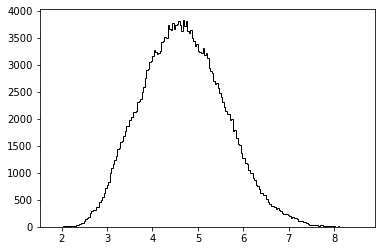

In [2]:
plt.hist(I0m0_f[:, 333] * 1e+6, bins = 200, color = 'k', histtype='step')
#plt.hist(I0m1[:, 333] * 1e+6, bins = 200, color = 'k', histtype='step')

plt.show()

In [15]:
len(I0m0[:, 333])

32768